In [307]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns


In [308]:
df=pd.read_csv('letters.csv')

In [309]:
pd.set_option('display.max_columns', None)
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel43,pixel44,pixel91,pixel92,pixel93,pixel94,pixel95,pixel96,pixel97,pixel98,pixel99,pixel100,pixel101,pixel102,pixel103,pixel104,pixel105,pixel106,pixel107,pixel108,pixel109,pixel110,pixel111,pixel112,pixel113,pixel114,pixel115,pixel116,pixel117,pixel118,pixel119,pixel120,pixel121,pixel122,pixel123,pixel124,pixel125,pixel126,pixel127,pixel128,pixel129,pixel130,pixel131,pixel132,pixel133,pixel134,pixel135,pixel136,pixel137,pixel138,pixel139,pixel140,pixel141,pixel142,pixel143,pixel144,pixel145,pixel146,pixel147,pixel148,pixel149,pixel150,pixel151,pixel152,pixel153,pixel154,pixel155,pixel156,pixel157,pixel158,pixel159,pixel160,pixel327,pixel328,pixel329,pixel330,pixel331,pixel332,pixel333,pixel334,pixel335,pixel336,pixel337,pixel338,pixel339,pixel340,pixel341,pixel342,pixel343,pixel344,pixel345,pixel346,pixel347,pixel348,pixel349,pixel350,pixel351,pixel352,pixel353,pixel354,pixel355,pixel356,pixel357,pixel358,pixel359,pixel360,pixel361,pixel362,pixel363,pixel364,pixel365,pixel366,pixel367,pixel368,pixel369,pixel370,pixel371,pixel372,pixel373,pixel374,pixel375,pixel376,pixel377,pixel378,pixel379,pixel380,pixel381,pixel382,pixel383,pixel384,pixel385,pixel386,pixel387,pixel388,pixel389,pixel390,pixel391,pixel392,pixel393,pixel394,pixel395,pixel396,pixel397,pixel398,pixel399,pixel400,pixel401,pixel402,pixel403,pixel404,pixel405,pixel406,pixel407,pixel408,pixel409,pixel410,pixel411,pixel412,pixel413,pixel414,pixel415,pixel416,pixel417,pixel418,pixel419,pixel420,pixel421,pixel422,pixel423,pixel424,pixel425,pixel426,pixel427,pixel428,pixel429,pixel430,pixel431,pixel432,pixel433,pixel434,pixel435,pixel436,pixel437,pixel438,pixel439,pixel440,pixel441,pixel442,pixel443,pixel444,pixel445,pixel446,pixel447,pixel448,pixel449,pixel450,pixel451,pixel452,pixel453,pixel454,pixel455,pixel456,pixel457,pixel458,pixel459,pixel460,pixel461,pixel462,pixel463,pixel464,pixel465,pixel466,pixel467,pixel468,pixel469,pixel470,pixel471,pixel472,pixel473,pixel474,pixel475,pixel476,pixel477,pixel478,pixel479,pixel480,pixel481,pixel482,pixel483,pixel484,pixel485,pixel486,pixel487,pixel488,pixel489,pixel490,pixel491,pixel492,pixel493,pixel494,pixel495,pixel496,pixel497,pixel498,pixel499,pixel500,pixel693,pixel694
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,188,255,94,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,191,250,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,209,253,254,240,81,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,27,253,253,254,13,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,206,254,254,198,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,168,253,253,196,7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,20,203,253,248,76,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,22,188,253,245,93,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,18,30,137,137,192,86,72,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,13,86,250,254,254,254,254,217,246,151,32,0,0,254,254,254,153,0,0,0,0,0,0,0,0,0,0,80,254,254,240,24,0,0,0,0,0,0,0,0,25,240,254,254,153,0,0,0,0,0,0,0,0,0,0,64,254,254,186,7,0,0,0,0,0,0,0,0,0,166,254,254,224,12,0,0,0,0,0,0,0,0,14,232,254,254,254,29,0,0,0,0,0,0,0,0,0,75,254,254,254,17,0,0,0,0,0,0,0,0,18,254,254,254,254,29,0,0,0,0,0,0,0,0,0,48,254,254,254,17,0,0,0,0,0,0,0,0,2,163,254,254,254,29,0,0,0,0,0,0,0,0,0,48,254,254,254,17,0,0,0,0,0,0,0,0,0,94,254,254,254,200,12,0,0,0,0,0,0,0,16,209,254,254,150,1,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,141,139,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,254,254,8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,89,254,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,146,254,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,9,254,254,184,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0

In [310]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc
from sklearn.model_selection import train_test_split

In [370]:
X=df.drop(['label'],axis=1)
#X=df.iloc[:,1:13]
y=df['label']
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [343]:
X_train.shape

(33600, 12)

In [344]:
#test = np.array(X_train.iloc[0,:]).reshape(7,37)

In [345]:
test = np.array(X_train.iloc[0,:]).reshape(3,4)

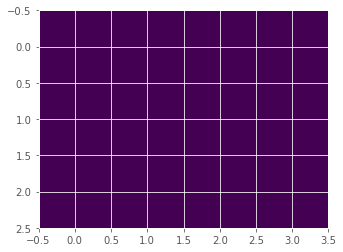

In [346]:
plt.imshow(test)

In [347]:
k_range = range(1,26)
scores = {}
scores_list =[]
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train,y_train)
    y_pred = knn.predict(X_test)
    scores[k]=metrics.accuracy_score(y_test,y_pred)
    scores_list.append(metrics.accuracy_score(y_test,y_pred))

Text(0.5, 1.0, 'Accuracy_rate VS. K value')

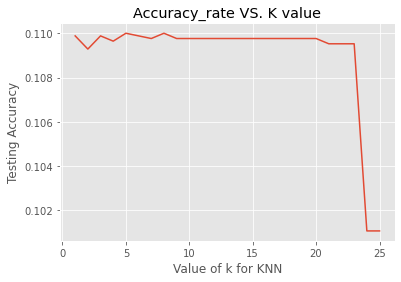

In [348]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of k for KNN')
plt.ylabel('Testing Accuracy')
plt.title('Accuracy_rate VS. K value')

In [349]:
print("The best K value in this dataset is {0} ; Accuracy = {1}".format(scores_list.index(max(scores_list)), max(scores_list)))

The best K value in this dataset is 4 ; Accuracy = 0.11


In [350]:
train_accuracy=knn.score(X_train,y_train)
train_accuracy

0.10056547619047619

In [351]:
#knn_final = KNeighborsClassifier(n_neighbors=7)
knn_final = KNeighborsClassifier(n_neighbors=4)
knn_final.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=4)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.00      0.00      0.00       816
           1       0.11      1.00      0.20       909
           2       0.00      0.00      0.00       846
           3       0.00      0.00      0.00       937
           4       0.00      0.00      0.00       839
           5       0.00      0.00      0.00       702
           6       0.86      0.02      0.03       785
           7       0.00      0.00      0.00       893
           8       0.00      0.00      0.00       835
           9       0.00      0.00      0.00       838

    accuracy                           0.11      8400
   macro avg       0.10      0.10      0.02      8400
weighted avg       0.09      0.11      0.02      8400



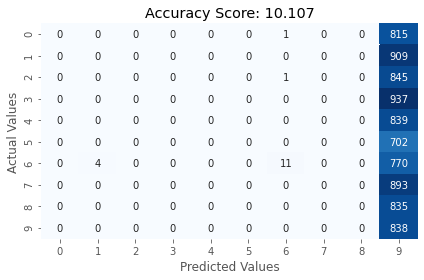

In [352]:
final_pred=knn_final.predict(X_test)
confusion_matrix(y_test,final_pred)
print(classification_report(y_test, final_pred))
accuracy=metrics.accuracy_score(y_test, y_pred)
sns.heatmap(pd.DataFrame(confusion_matrix(y_test, y_pred)), annot = True, cbar=False,cmap='Blues',fmt='g')
plt.ylabel('Actual Values')
plt.xlabel('Predicted Values')
plt.title('Accuracy Score: {0}'.format(round(accuracy*100, 3), size = 15))
plt.tight_layout()
plt.show()

In [353]:
from itertools import cycle

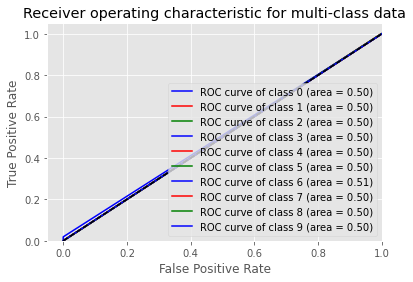

In [354]:

pred_prob = knn_final.predict_proba(X_test)

n_classes = 10
fpr = dict()
tpr = dict()
thresh = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], thresh[i] = roc_curve(y_test, pred_prob[:,i], pos_label=i)
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green'])
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i],color=color, lw=1.5,label='ROC curve of class {0} (area = {1:0.2f})'.format(i, roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k--', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [355]:
from sklearn import neural_network

In [356]:
model = neural_network.MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam',\
                                     alpha=0.0001, batch_size='auto', learning_rate='constant', \
                                     learning_rate_init=0.001, power_t=0.5, max_iter=1000, shuffle=True, \
                                     random_state=None, tol=0.0001, verbose=False, warm_start=False, \
                                     momentum=0.9, nesterovs_momentum=True, early_stopping=False, \
                                     validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, n_iter_no_change=10)


In [357]:
model.fit(X_train, y_train)


MLPClassifier(max_iter=1000)

In [358]:
from sklearn.metrics import accuracy_score
print('\n-- Training data --')
predictions_train = model.predict(X_train)
accuracy_train = accuracy_score(y_train, predictions_train)
print('Accuracy: {0:.2f}'.format(accuracy_train * 100.0))
print('Classification Report:')
print(classification_report(y_train, predictions_train))
print('Confusion Matrix:')
print(confusion_matrix(y_train, predictions_train))
print('')


-- Training data --
Accuracy: 11.33
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      3316
           1       0.11      1.00      0.20      3775
           2       0.00      0.00      0.00      3331
           3       0.00      0.00      0.00      3414
           4       0.00      0.00      0.00      3233
           5       0.00      0.00      0.00      3093
           6       0.80      0.01      0.02      3352
           7       0.00      0.00      0.00      3508
           8       0.00      0.00      0.00      3228
           9       0.00      0.00      0.00      3350

    accuracy                           0.11     33600
   macro avg       0.09      0.10      0.02     33600
weighted avg       0.09      0.11      0.02     33600

Confusion Matrix:
[[   0 3316    0    0    0    0    0    0    0    0]
 [   0 3774    0    0    0    0    1    0    0    0]
 [   0 3324    0    0    0    0    7    0    0    0]
 [  

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [359]:
# Evaluate on test data
print('\n---- Test data ----')
predictions = model.predict(X_test)
accuracy_nn = accuracy_score(y_test, predictions)
print('Accuracy: {0:.2f}'.format(accuracy_nn * 100.0))
print('Classification Report:')
print(classification_report(y_test, predictions))
print('Confusion Matrix:')
print(confusion_matrix(y_test, predictions))


---- Test data ----
Accuracy: 11.00
Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       816
           1       0.11      1.00      0.20       909
           2       0.00      0.00      0.00       846
           3       0.00      0.00      0.00       937
           4       0.00      0.00      0.00       839
           5       0.00      0.00      0.00       702
           6       0.88      0.02      0.04       785
           7       0.00      0.00      0.00       893
           8       0.00      0.00      0.00       835
           9       0.00      0.00      0.00       838

    accuracy                           0.11      8400
   macro avg       0.10      0.10      0.02      8400
weighted avg       0.09      0.11      0.02      8400

Confusion Matrix:
[[  0 815   0   0   0   0   1   0   0   0]
 [  0 909   0   0   0   0   0   0   0   0]
 [  0 845   0   0   0   0   1   0   0   0]
 [  0 937   0   0   0   0   0   0 

/opt/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [329]:
from keras.models import Sequential
from keras.layers import Dense

In [396]:
input_dim = X_train.shape[1]  # Number of features

nerual_network = Sequential()
nerual_network.add(Dense(128, input_dim=input_dim, activation='relu'))
nerual_network.add(Dense(64, activation='relu'))
nerual_network.add(Dense(32, activation='relu'))
nerual_network.add(Dense(10, activation='softmax'))

In [397]:
nerual_network.compile(loss='sparse_categorical_crossentropy',optimizer='adam', metrics=['accuracy'])
nerual_network.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               33280     
_________________________________________________________________
dense_1 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_2 (Dense)              (None, 32)                2080      
_________________________________________________________________
dense_3 (Dense)              (None, 10)                330       
Total params: 43,946
Trainable params: 43,946
Non-trainable params: 0
_________________________________________________________________


In [398]:
history = nerual_network.fit(X_train, y_train,epochs=10,verbose=2,validation_data=(X_test, y_test),batch_size=8)

Epoch 1/10
4200/4200 - 3s - loss: 1.4152 - accuracy: 0.6227 - val_loss: 0.6565 - val_accuracy: 0.7814
Epoch 2/10
4200/4200 - 3s - loss: 0.5508 - accuracy: 0.8196 - val_loss: 0.4925 - val_accuracy: 0.8473
Epoch 3/10
4200/4200 - 3s - loss: 0.4107 - accuracy: 0.8686 - val_loss: 0.3987 - val_accuracy: 0.8770
Epoch 4/10
4200/4200 - 3s - loss: 0.3602 - accuracy: 0.8877 - val_loss: 0.3726 - val_accuracy: 0.8804
Epoch 5/10
4200/4200 - 2s - loss: 0.3166 - accuracy: 0.8988 - val_loss: 0.3497 - val_accuracy: 0.8915
Epoch 6/10
4200/4200 - 3s - loss: 0.2937 - accuracy: 0.9089 - val_loss: 0.3285 - val_accuracy: 0.9008
Epoch 7/10
4200/4200 - 3s - loss: 0.2762 - accuracy: 0.9151 - val_loss: 0.3074 - val_accuracy: 0.9086
Epoch 8/10
4200/4200 - 3s - loss: 0.2614 - accuracy: 0.9196 - val_loss: 0.3065 - val_accuracy: 0.9107
Epoch 9/10
4200/4200 - 3s - loss: 0.2547 - accuracy: 0.9224 - val_loss: 0.3038 - val_accuracy: 0.9143
Epoch 10/10
4200/4200 - 3s - loss: 0.2398 - accuracy: 0.9271 - val_loss: 0.3320 - 

In [399]:
from keras.backend import clear_session
clear_session()

In [400]:
loss_train, accuracy_t = nerual_network.evaluate(X_train, y_train, verbose=False)
print("Training Accuracy: {:.4f}".format(accuracy_t))
loss_test, accuracy_tt = nerual_network.evaluate(X_test, y_test, verbose=False)
print("Testing Accuracy:  {:.4f}".format(accuracy_tt))

Training Accuracy: 0.9262
Testing Accuracy:  0.9063


In [401]:
plt.style.use('ggplot')

def plot_history(history):
    acc = history.history['accuracy']
    val_acc = history.history['val_accuracy']
    loss = history.history['loss']
    val_loss = history.history['val_loss']
    x = range(1, len(acc) + 1)

    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(x, acc, 'b', label='Training acc')
    plt.plot(x, val_acc, 'r', label='Validation acc')
    plt.title('Training and validation accuracy')
    plt.legend()
    plt.subplot(1, 2, 2)
    plt.plot(x, loss, 'b', label='Training loss')
    plt.plot(x, val_loss, 'r', label='Validation loss')
    plt.title('Training and validation loss')
    plt.legend()

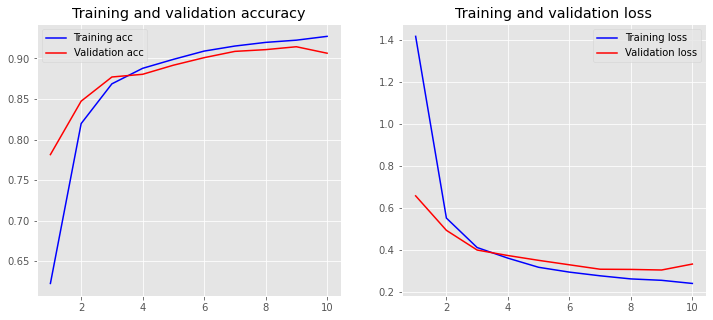

In [402]:
plot_history(history)